# Exploring the Differences Between a Traditional SSP Framework and a Global Warming Levels Approach

In this notebook, we will explore the different scientific procedures that go behind two major approaches towards understanding regional global warming today:
1. Traditional global warming approach using SSP's (Shared Socioeconomic Pathways)
    - We will reference this approach as the **Traditional SSP Approach** throughout this notebook.
2. New global warming approach using Warming Levels
    - We will reference this approach as the **New GWL Approach** throughout this notebook.

From this notebook, we will understand:
- The different approaches towards understanding global warming levels
- Calculating a metric on both approaches' datasets to see what are the differences

**Intended Application:** As a user, I want to  **<span style="color:#FF0000">understand the differences between a traditional SSP approach and the new Global Warming Levels framework, and use cases where I would consider a Global Warming Levels framework over a traditional SSP approach.</span>**

**Runtime**: With the default settings, this notebook takes approximately **10 minutes** to run from start to finish. Modifications to selections may increase the runtime.

## Step 1: Conceptual explanation of GWL

**TODO: Insert conceptual explanation of GWL here**

## Step 2: Using AE to load climate data on GWLs

#### Importing libraries and helpers

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from climakitae.core.data_load import load
from climakitae.util.utils import add_dummy_time_to_wl
from climakitae.util.unit_conversions import convert_units

In this notebook, we'll be demonstrating two methods to grab Global Warming Level data from `climakitae`: `get_data` and `ClimateData`. Both methods are valid for retrieving our climate data. For more information about how both of these methods work, check out <a href="https://github.com/cal-adapt/cae-notebooks/blob/main/data-access/basic_data_access.ipynb" target="_blank" style="color: blue; text-decoration: underline;">this notebook</a>.


**In this notebook, we will be using warming levels 0.8 and 2.0 to compare a historical climate and a future climate respectively.**

We will be grabbing the following data for demonstration purposes:
- Maximum air temperature at 2m
- LOCA2-downscaled
- Monthly time frequency
- 3 km
- Warming Levels: 0.8 and 2.0, with a warming level window of 15 years.

### Method 1: `get_data`

First, we'll go through an example that retrieves data using `get_data`.

In [4]:
from climakitae.core.data_interface import get_data
gwl_data = get_data(
    variable="Maximum air temperature at 2m",
    resolution="3 km",
    timescale="monthly",
    downscaling_method="Statistical",
    approach="Warming Level",
    warming_level=[0.8, 2.0]
)

KeyboardInterrupt: 

### Method 2: `ClimateData`

Now, we'll go through an example retrieving the same data using the newer `ClimateData` class.

In [3]:
from climakitae.new_core.user_interface import ClimateData
cd = ClimateData()

✅ Ready to query! 


Above, we've created a `ClimateData` object called `cd`, which we will use to grab GWL (Global Warming Level approach) data below.

In [5]:
# Here is an example of loading data at 2 specific warming levels (0.8 and 2.0) with a 15-year window for Max Temp.
gwl_data = (cd
    .catalog("cadcat") 
    .activity_id("LOCA2")   # Statistical downscaling
    .table_id("mon")        # Looking at `monthly` data
    .grid_label("d03")      # Looking at `45 km` data
    .variable("tasmax")     # Grabbing the maximum temperature variable
    .processes({            # Centering our dataset around GWLs
        "warming_level": {
            "warming_levels": [0.8, 2.0], # Available warming levels include: 0.8, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0
            "warming_level_window": 15, # Default is 15
            # "warming_level_months": [6, 7, 8], # Optional: specify months for seasonal averages, still WIP development
        },
    })
    .get()
)

Found 56 datasets matching your query.
Checking processes ...
Querying cadcat catalog with query: {'activity_id': 'LOCA2', 'table_id': 'mon', 'grid_label': 'd03', 'variable_id': 'tasmax'}


INFO: Prepending historical data to SSP scenarios.
      This is the default concatenation strategy for retrieved data in climakitae.
      To change this behavior, set `"concat": "sim"` in your processes dictionary.
Concatenated datasets along 'sim' dimension.
✅ Data retrieval successful!


**You'll notice how we did not have to specify an SSP to choose in either example**. 

This is inline with what we discussed about GWLs above, that *one of the benefits of a GWL approach means not needing to choose an SSP scenario*.

We are also not limited to the parameters listed above. We'll retrieve another set of Global Warming Level data with totally different parameters.

In [ ]:
other_gwl_data = (cd
    .catalog("cadcat")    # Same catalog of data as before
    .activity_id("WRF")   # Dynamically-downscaled data
    .table_id("day")      # Daily data
    .grid_label("d02")    # 9 km data
    .variable("prec")     # Precipitation data
    .processes({         
        "warming_level": {
            "warming_levels": [1.5, 3.0], # Available warming levels include: 0.8, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0
            "warming_level_window": 10, # Number of years (+/-) around warming level to retrieve
        },
    })
    .get()
)

### What does this data look like?

Let's take a look at the objects and some quick visualizations of the data.

In [6]:
# Looking at the `gwl_data` variable
gwl_data

<xarray.Dataset> Size: 206GB
Dimensions:        (sim: 129, warming_level: 2, time_delta: 360, lat: 495,
                    lon: 559)
Coordinates:
  * sim            (sim) object 1kB 'LOCA2_UCSD_TaiESM1_ssp370_mon_d03_r1i1p1...
  * warming_level  (warming_level) float64 16B 0.8 2.0
  * lat            (lat) float32 2kB 29.58 29.61 29.64 ... 44.95 44.98 45.02
  * lon            (lon) float32 2kB -128.4 -128.4 -128.4 ... -111.0 -111.0
  * time_delta     (time_delta) int64 3kB -180 -179 -178 -177 ... 177 178 179
    simulation     (sim) <U50 26kB 'LOCA2.UCSD.TaiESM1.ssp370.mon.d03.r1i1p1f...
    centered_year  (sim, warming_level) int64 2kB 2011 2040 2012 ... 1953 2032
Data variables:
    tasmax         (sim, warming_level, time_delta, lat, lon) float64 206GB dask.array<chunksize=(1, 1, 12, 255, 255), meta=np.ndarray>
Attributes: (12/107)
    Conventions:                         CF-1.7 CMIP-6.2
    ID_loca_routines_module:             $Id: loca_routines_module.F90,v 1.13...
    SIOCRD_netCDF_Version:               1.0
    SOURCE_loca_routines_module:         $Source: /home6/dwpierc2/src/mine/lo...
    activity_id:                         CMIP
    bias_correction:                     downscaling via PresRat, Pierce et a...
    ...                                  ...
    resolution:                          3 km
    warming_level:                       {'warming_levels': [0.8, 2.0], 'warm...
    filter_unadjusted_models:            yes
    concat:                              Process 'concat' applied to the data...
    update_attributes:                   Process 'update_attributes' applied ...
    warming_level_simple:                Process 'warming_level_simple' appli...

**ASIDE: One key difference between the `gwl_data` object returned by `ClimateData` and `get_data` is that `ClimateData` will return a xr.Dataset, while `get_data` will return a xr.DataArray. You will just need to dot index (i.e. `gwl_data.tasmax`) into the xr.Dataset to get the DataArray information from above.**

You'll notice that there are two dimensions and one coordinate that are not common in climate data retrieved using an SSP-approach:
1. `warming_level`: This dimension denotes which warming levels the data is centered around, and in this case, we can see the values as 0.8 and 2.0. These are the same as the WLs we chose above.
2. `time_delta`: This dimension represents the offset in timesteps from the `centered_year` of a given simulation. Since each simulation spans 30 years, we can align and stack them along a common `time_delta` axis. Negative values indicate timesteps before the `centered_year`, while positive values indicate timesteps after it.
3. `centered_year`: The year that a given simulation reaches a certain `warming_level`.

Now, let's take a quick glance at what this data looks like in a couple of figures:

In [9]:
gwl_data.isel(sim=0)

<xarray.Dataset> Size: 2GB
Dimensions:        (warming_level: 2, time_delta: 360, lat: 495, lon: 559)
Coordinates:
    sim            <U42 168B 'LOCA2_UCSD_TaiESM1_ssp370_mon_d03_r1i1p1f1'
  * warming_level  (warming_level) float64 16B 0.8 2.0
  * lat            (lat) float32 2kB 29.58 29.61 29.64 ... 44.95 44.98 45.02
  * lon            (lon) float32 2kB -128.4 -128.4 -128.4 ... -111.0 -111.0
  * time_delta     (time_delta) int64 3kB -180 -179 -178 -177 ... 177 178 179
    simulation     <U50 200B 'LOCA2.UCSD.TaiESM1.ssp370.mon.d03.r1i1p1f1'
    centered_year  (warming_level) int64 16B 2011 2040
Data variables:
    tasmax         (warming_level, time_delta, lat, lon) float64 2GB dask.array<chunksize=(1, 12, 255, 255), meta=np.ndarray>
Attributes: (12/107)
    Conventions:                         CF-1.7 CMIP-6.2
    ID_loca_routines_module:             $Id: loca_routines_module.F90,v 1.13...
    SIOCRD_netCDF_Version:               1.0
    SOURCE_loca_routines_module:         $Source: /home6/dwpierc2/src/mine/lo...
    activity_id:                         CMIP
    bias_correction:                     downscaling via PresRat, Pierce et a...
    ...                                  ...
    resolution:                          3 km
    warming_level:                       {'warming_levels': [0.8, 2.0], 'warm...
    filter_unadjusted_models:            yes
    concat:                              Process 'concat' applied to the data...
    update_attributes:                   Process 'update_attributes' applied ...
    warming_level_simple:                Process 'warming_level_simple' appli...

In [ ]:
# Plotting the first timestep of GWL max temp data in a side-by-side plot
from warming_level_approach_helpers import fig1, lighter_r_rev

# Selecting the first simulation, then converting temperature to degF and averaging across the WL data
arr = convert_units(gwl_data.tasmax.isel(sim=0), 'degF').mean(dim='time_delta').compute()

# Finding the difference between WL 2.0 and WL 0.8
diff = arr.sel(warming_level=arr.warming_level.values[-1]) - arr.sel(
    warming_level=arr.warming_level.values[0]
)

In [ ]:
# Using a plotting helper to plot the average warming and a delta plot
fig1(arr, diff)

#### **It's STRONGLY recommended to take the deltas of warming levels before aggregating across simulations**.

Below is another example demonstrating how we recommend doing these types of delta analyses. 

In [ ]:
# Here, we're taking a subset of simulations to look at (just the first 10 simulations).
subset_gwl_data = gwl_data.isel(sim=range(10))

# Then, we TAKE THE DIFFERENCE between warming levels before aggregating across simulations.
wl_diff = subset_gwl_data.sel(warming_level=2.0) - subset_gwl_data.sel(warming_level=0.8)

# Finally, we average the differences across simulations and time.
avg_diff = wl_diff.mean(dim=['sim', 'time_delta'])

In [ ]:
# Plot the difference to see what it looks like
p = avg_diff.tasmax.plot(cmap=lighter_r_rev)
p.colorbar.set_label("Δ Tasmax (°F)")
plt.title('Avg Max Temp Diff between WL 2.0 and\nWL 0.8 of 10 LOCA2 Simulations')
plt.show()

## Step 3: Using AE to load climate data for target-year planning

Now that we've seen a GWL approach in action, let's go back to an SSP-approach and grab data using that approach.

But in order to do that, we need to know **when** to grab this data. What are `GWL 2.0 and 0.8` in an SSP-approach? Fortunately, we have a tool to answer this very question.

The `get_year_at_gwl` tool translates GWLs to years using IPCC trajectories. If you're interested in learning more about how these tools work, check out the following notebook that dives deeper into its usage: **TODO: FILL LINK HERE ONCE NOTEBOOK IS MERGED**

In [10]:
from climakitae.util.warming_levels import get_year_at_gwl

#### **Grabbing SSP-equivalent data of WL 0.8**

In [11]:
# Let's see what year the world would reach 0.8 degrees celsius of warming above pre-industrial levels at different SSP trajectories
get_year_at_gwl(0.8, 'all')

,5%,Mean,95%
Historical,1990.0,2002.0,2010.0
SSP 1-1.9,2015.0,2015.0,2015.0
SSP 1-2.6,2015.0,2015.0,2015.0
SSP 2-4.5,2015.0,2015.0,2015.0
SSP 3-7.0,2015.0,2015.0,2015.0
SSP 5-8.5,2015.0,2015.0,2015.0


We'll only be looking at the historical row for WL 0.8, as no simulations reach 0.8 degrees of warming before 2015 (when SSP data begins). 

We'll take a 30-year time slice around the year **2002**.

In [12]:
# Here, we'll use the `ClimateData` object again now to retrieve SSP data.
time_data_08 = (cd
    .catalog("cadcat")
    .activity_id("LOCA2")                    # Statistical downscaling
    .table_id("mon")                         # Looking at `monthly` data
    .grid_label("d03")                       # Looking at `45 km` data
    .variable("pr")                          # Grabbing the precipitation variable (will be used later)
    .experiment_id(["historical", "ssp370"]) # Grabbing historical + SSP 3-7.0 data
    .processes({
        "time_slice": ('1987-01-01', '2016-12-31'), # Only selecting data from 1987 to 2017 (a 30-year slice around the year 2002).
    })
    .get()
)

Found 29 datasets matching your query.
Checking processes ...
Querying cadcat catalog with query: {'activity_id': 'LOCA2', 'experiment_id': ['historical', 'ssp370'], 'table_id': 'mon', 'grid_label': 'd03', 'variable_id': 'pr'}


INFO: Prepending historical data to SSP scenarios.
      This is the default concatenation strategy for retrieved data in climakitae.
      To change this behavior, set `"concat": "sim"` in your processes dictionary.
Concatenated datasets along 'sim' dimension.
✅ Data retrieval successful!


#### **Grabbing SSP-equivalent data of WL 2.0**

In [13]:
# Let's see what year the world would reach 2.0 degrees celsius of warming above pre-industrial levels at different SSP trajectories
get_year_at_gwl(2.0, 'all')

,5%,Mean,95%
Historical,NaN,NaN,NaN
SSP 1-1.9,NaN,NaN,NaN
SSP 1-2.6,NaN,NaN,NaN
SSP 2-4.5,2039.0,2053.0,2081.0
SSP 3-7.0,2037.0,2047.0,2061.0
SSP 5-8.5,2034.0,2042.0,2054.0


Let's use SSP 3-7.0 for comparison, and take a 30-year time slice of data around the year **2047** (based on the table above).

In [14]:
# Here, we'll use the `ClimateData` object again now to retrieve SSP data.
time_data_20 = (cd
    .catalog("cadcat")
    .activity_id("LOCA2")                    # Statistical downscaling
    .table_id("mon")                         # Looking at `monthly` data
    .grid_label("d03")                       # Looking at `45 km` data
    .variable("pr")                          # Grabbing the precipitation variable (will be used later)
    .experiment_id(["historical", "ssp370"]) # Grabbing historical + SSP 3-7.0 data
    .processes({
        "time_slice": ('2033-01-01', '2062-12-31'), # Only selecting data from 2033 to 2062 (a 30-year slice around the year 2047).
    })
    .get()
)

Found 29 datasets matching your query.
Checking processes ...
Querying cadcat catalog with query: {'activity_id': 'LOCA2', 'experiment_id': ['historical', 'ssp370'], 'table_id': 'mon', 'grid_label': 'd03', 'variable_id': 'pr'}


INFO: Prepending historical data to SSP scenarios.
      This is the default concatenation strategy for retrieved data in climakitae.
      To change this behavior, set `"concat": "sim"` in your processes dictionary.
Concatenated datasets along 'sim' dimension.
✅ Data retrieval successful!


## Step 4: Do some analysis on the data we loaded

For the next two sections, we are going to conduct a comparison of the two datasets by analyzing *extreme precipitation events.* More specifically, we will try to answer the following question:
<br>
<br>

<h4>&emsp;How might extreme precipitation events change under a 0.8°C and 2.0°C warming world, for Half Dome in Yosemite National Park?</h4>

We will conduct a comparison between the 0.8°C and 2.0°C datasets, and do a corresponding time-based component comparison, to further illustrate the usefulness of a GWL approach.

We're going to look at extreme precipitation events for Steps 4 and 5 to further illustrate the usefulness of a GWL approach.

In [15]:
precip_gwl_data = (cd
    .catalog("cadcat")    # Same catalog of data as before
    .activity_id("LOCA2") # Statistically-downscaled data
    .table_id("mon")      # Monthly data
    .grid_label("d03")    # 3 km data
    .variable("pr")       # Precipitation data
    .processes({         
        "warming_level": {
            "warming_levels": [0.8, 2.0], # Available warming levels include: 0.8, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0
            "warming_level_window": 15, # Number of years (+/-) around warming level to retrieve
        },
    })
    .get()
)

Found 56 datasets matching your query.
Checking processes ...
Querying cadcat catalog with query: {'activity_id': 'LOCA2', 'table_id': 'mon', 'grid_label': 'd03', 'variable_id': 'pr'}


INFO: Prepending historical data to SSP scenarios.
      This is the default concatenation strategy for retrieved data in climakitae.
      To change this behavior, set `"concat": "sim"` in your processes dictionary.
Concatenated datasets along 'sim' dimension.
✅ Data retrieval successful!


In [16]:
# We're going to clip our data to the gridcell of interest
lat = 37.745899
lon = -119.533197

gwl_halfdome = precip_gwl_data.sel(lat=lat, lon=lon, method='nearest')
time_08_halfdome = time_data_08.sel(lat=lat, lon=lon, method='nearest')
time_20_halfdome = time_data_20.sel(lat=lat, lon=lon, method='nearest')

Now that our data is clipped, let's analyze both our GWL data and our SSP data.

### GWL-approach analysis

We will be using a function called `add_dummy_time_to_wl`. This function replaces the `time_delta` axis in GWL data with a dummy time axis (starting from 2000), in order to do time-based operations.

We will take a look at:
1. The 99th percentile of historical precipitation events.
2. Use that as a threshold for determining the future extreme precipitation events.

In [17]:
# Setting some params for both approaches
data_freq = "monthly"
q = 0.999

In [18]:
# Using the `add_dummy_time_to_wl` function so that we can do other time-based operations later.
gwl_halfdome_dummytime = add_dummy_time_to_wl(gwl_halfdome.pr, freq_name=data_freq)
gwl_halfdome_dummytime.attrs["frequency"] = data_freq
gwl_inches = convert_units(gwl_halfdome_dummytime, 'inches') # Converting to inches of rain

In [19]:
# 1. Find the 99th percentile of historical precipitation events
hist_q = gwl_inches.sel(warming_level=0.8).quantile(q=q, dim='time')

In [20]:
# 2. Determine future extreme preciptiation events
future_extreme_gwl = gwl_inches.sel(warming_level=2.0).where(gwl_inches.sel(warming_level=2.0) > hist_q).compute()

### Time-based approach analysis

With a time-based approach, we will similarly look at:
1. The 99.9th percentile of historical precipitation events (1987-2016)
2. Use that threshold for determining future extreme precipitation events (2033-2062)

In [21]:
# 1. Find the 99.9th percentile of historical precipitation events
time_08_halfdome.pr.attrs["frequency"] = data_freq
hist_time_inches = convert_units(time_08_halfdome.pr, 'inches')
hist_q = hist_time_inches.quantile(q=q, dim='time')

In [22]:
# 2. Determine future extreme preciptiation events
time_20_halfdome.pr.attrs["frequency"] = data_freq
future_time_inches = convert_units(time_20_halfdome.pr, 'inches')
future_extreme_time = future_time_inches.where(future_time_inches > hist_q).compute()

## Step 5: Illustrating differences between GWL and target-year planning

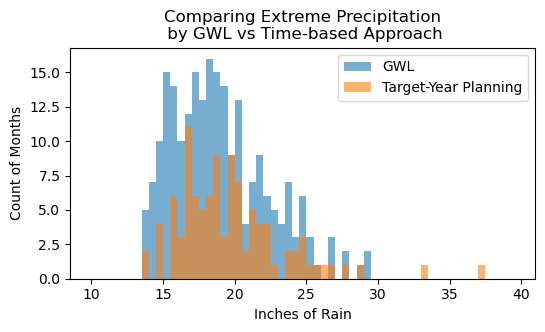

In [23]:
# Plotting the differences between GWL and target-year planning
plt.figure(figsize=(6, 3))
future_extreme_gwl.plot.hist(width=0.5, bins = np.arange(10, 40, 0.5), alpha=0.6, label='GWL')
future_extreme_time.plot.hist(width=0.5, bins = np.arange(10, 40, 0.5), alpha=0.6, label='Target-Year Planning')
plt.title('Comparing Extreme Precipitation\n by GWL vs Time-based Approach')
plt.xlabel('Inches of Rain')
plt.ylabel('Count of Months')
plt.legend()
plt.show();

As we can see from the above plot, there are visually more counts of extreme precipitation events under a GWL approach than a target-year approach. By using a GWL approach, we gain access to a larger set of future extreme precipitation events, allowing for more detailed examination and helping Half Dome better prepare for such extremes.

Extreme event analysis is particularly well-suited to a GWL approach, since having a larger sample of extreme events is essential for robust climate assessments. More samples improve statistical reliability, enhance characterization of rare events, and provide stronger insights into the potential impacts of future precipitation extremes.

**If you're interested in learning more about use-cases when you'd want to use a Global Warming Level approach over a time-based approach, check out our guidance <a href="https://analytics.cal-adapt.org/guidance/using_in_decision_making/#how-should-a-user-choose-between-global-warming-levels-and-a-time-based-approach-to-planning" target="_blank" style="color: blue; text-decoration: underline;">here</a> for more details.**